# Hyperliquid API exploration
There is a rate limit of 1200 requests per minute per IP address. Use websockets for lowest latency realtime data. See the python SDK for a full-featured example.

Sizes are rounded to the szDecimals of that asset. For example, if szDecimals = 3 then 1.001 is a valid size but 1.0001 is not.
You can find the szDecimals for an asset by making a meta request to the info endpoint

In [1]:
from hyperliquid.api import API
from hyperliquid.info import Info
from hyperliquid.utils import constants
from datetime import datetime, timedelta
import math
import pandas as pd
import matplotlib.pyplot as plt

/var/folders/jx/4v9v0hls2gxd_41whdcq9g100000gn/T/ipykernel_96878/3187487259.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
int(datetime.now().timestamp()-timedelta(days=1).total_seconds())

1708545796

In [3]:
info_endpoint = Info(constants.MAINNET_API_URL)
tokens_ticker = [d['name'] for d in info_endpoint.meta()['universe']]

In [4]:
start_time = int(datetime(year=2023, day=1 ,month=7).timestamp())
stop_time = int(datetime.now().timestamp())
print(start_time, stop_time)

1688155200 1708632197


In [5]:

start_time = datetime(year=2023, day=1 ,month=7)
stop_time = datetime.now()

# Liste pour stocker les plages de dates
date_ranges = []
print(start_time, stop_time)
i=0
while start_time < stop_time:
    start_time = start_time + timedelta(hours=500)
    print(start_time)
    date_ranges.append(start_time)

print(date_ranges)

2023-07-01 00:00:00 2024-02-23 00:03:17.275715
2023-07-21 20:00:00
2023-08-11 16:00:00
2023-09-01 12:00:00
2023-09-22 08:00:00
2023-10-13 04:00:00
2023-11-03 00:00:00
2023-11-23 20:00:00
2023-12-14 16:00:00
2024-01-04 12:00:00
2024-01-25 08:00:00
2024-02-15 04:00:00
2024-03-07 00:00:00
[datetime.datetime(2023, 7, 21, 20, 0), datetime.datetime(2023, 8, 11, 16, 0), datetime.datetime(2023, 9, 1, 12, 0), datetime.datetime(2023, 9, 22, 8, 0), datetime.datetime(2023, 10, 13, 4, 0), datetime.datetime(2023, 11, 3, 0, 0), datetime.datetime(2023, 11, 23, 20, 0), datetime.datetime(2023, 12, 14, 16, 0), datetime.datetime(2024, 1, 4, 12, 0), datetime.datetime(2024, 1, 25, 8, 0), datetime.datetime(2024, 2, 15, 4, 0), datetime.datetime(2024, 3, 7, 0, 0)]


In [6]:
tokens_historical_fundings = []

for token in tokens_ticker:
    for start_time in date_ranges:
        try :
            print(token, start_time)
            token_funding_history = info_endpoint.funding_history(token, startTime=int(start_time.timestamp())*1000)
            tokens_historical_fundings.extend(token_funding_history)

        except Exception as e:
            print(f'{e} on token :', token)
            continue

tokens_historical_fundings

BTC 2023-07-21 20:00:00
BTC 2023-08-11 16:00:00
BTC 2023-09-01 12:00:00
BTC 2023-09-22 08:00:00
BTC 2023-10-13 04:00:00
BTC 2023-11-03 00:00:00
BTC 2023-11-23 20:00:00
BTC 2023-12-14 16:00:00
BTC 2024-01-04 12:00:00
BTC 2024-01-25 08:00:00
BTC 2024-02-15 04:00:00
BTC 2024-03-07 00:00:00
ETH 2023-07-21 20:00:00
ETH 2023-08-11 16:00:00
ETH 2023-09-01 12:00:00
ETH 2023-09-22 08:00:00
ETH 2023-10-13 04:00:00
ETH 2023-11-03 00:00:00
ETH 2023-11-23 20:00:00
ETH 2023-12-14 16:00:00
ETH 2024-01-04 12:00:00
ETH 2024-01-25 08:00:00
ETH 2024-02-15 04:00:00
ETH 2024-03-07 00:00:00
ATOM 2023-07-21 20:00:00
ATOM 2023-08-11 16:00:00
ATOM 2023-09-01 12:00:00
ATOM 2023-09-22 08:00:00
ATOM 2023-10-13 04:00:00
ATOM 2023-11-03 00:00:00
ATOM 2023-11-23 20:00:00
ATOM 2023-12-14 16:00:00
ATOM 2024-01-04 12:00:00
ATOM 2024-01-25 08:00:00
ATOM 2024-02-15 04:00:00
ATOM 2024-03-07 00:00:00
MATIC 2023-07-21 20:00:00
MATIC 2023-08-11 16:00:00
MATIC 2023-09-01 12:00:00
MATIC 2023-09-22 08:00:00
MATIC 2023-10-13 04:

[{'coin': 'BTC',
  'fundingRate': '0.00000641',
  'premium': '-0.00024869',
  'time': 1689955200020},
 {'coin': 'BTC',
  'fundingRate': '0.00000448',
  'premium': '-0.0002642',
  'time': 1689958800048},
 {'coin': 'BTC',
  'fundingRate': '-0.00000195',
  'premium': '-0.00031563',
  'time': 1689962400039},
 {'coin': 'BTC',
  'fundingRate': '0.00000942',
  'premium': '-0.00022462',
  'time': 1689966000150},
 {'coin': 'BTC',
  'fundingRate': '0.0000125',
  'premium': '-0.00019161',
  'time': 1689969600010},
 {'coin': 'BTC',
  'fundingRate': '0.0000125',
  'premium': '-0.00019334',
  'time': 1689973200181},
 {'coin': 'BTC',
  'fundingRate': '0.00000055',
  'premium': '-0.00029562',
  'time': 1689976800132},
 {'coin': 'BTC',
  'fundingRate': '0.00000036',
  'premium': '-0.00029711',
  'time': 1689980400159},
 {'coin': 'BTC',
  'fundingRate': '0.0000075',
  'premium': '-0.00024003',
  'time': 1689984000073},
 {'coin': 'BTC',
  'fundingRate': '0.00001006',
  'premium': '-0.00021955',
  'time':

In [18]:
# Extraction des données
extracted_data = [(d['coin'], d['time'], d['fundingRate']) for d in tokens_historical_fundings]

# Création du DataFrame
df = pd.DataFrame(extracted_data, columns=['coin', 'time', 'fundingRate'])
df.drop_duplicates(inplace=True)

# Pivotez le DataFrame
df_pivot = df.pivot(index='time', columns='coin', values='fundingRate')
df_pivot.index = pd.to_datetime(df_pivot.index, unit='ms')
df_pivot.index = df_pivot.index.floor('H')
df_pivot.index = df_pivot.index.strftime('%Y-%m-%d %H:%M:%S')
df_pivot = df_pivot.apply(pd.to_numeric)

# Suppression des colonnes où toutes les valeurs sont NaN
df_pivot_clean = df_pivot.dropna(axis=1)
df_pivot_clean

/var/folders/jx/4v9v0hls2gxd_41whdcq9g100000gn/T/ipykernel_96878/1373692287.py:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_pivot.index = df_pivot.index.floor('H')


coin,ATOM,BCH,BTC,DYDX,ETH,GMX,MATIC,SNX,XRP
time,,,,,,,,,
2023-07-21 16:00:00,-0.000024,-0.000059,0.000006,-0.000015,-0.000004,-0.000073,-2.080000e-06,0.000069,-0.000025
2023-07-21 17:00:00,-0.000023,-0.000056,0.000004,0.000013,-0.000005,-0.000071,1.860000e-06,0.000059,-0.000007
2023-07-21 18:00:00,-0.000032,-0.000054,-0.000002,0.000005,0.000003,-0.000074,2.970000e-06,0.000057,-0.000020
2023-07-21 19:00:00,-0.000024,-0.000052,0.000009,-0.000010,0.000011,-0.000072,2.600000e-07,0.000067,-0.000023
2023-07-21 20:00:00,-0.000017,-0.000029,0.000013,0.000012,0.000013,-0.000085,1.250000e-05,0.000080,-0.000017
...,...,...,...,...,...,...,...,...,...
2024-02-22 16:00:00,0.000013,0.000013,0.000013,0.000144,0.000013,0.000080,8.518000e-05,0.000017,0.000039
2024-02-22 17:00:00,0.000013,0.000013,0.000013,0.000071,0.000013,0.000037,5.258000e-05,0.000013,0.000020
2024-02-22 18:00:00,0.000013,0.000013,0.000013,0.000089,0.000013,0.000052,6.590000e-05,0.000013,0.000028


In [19]:
# Scale the funding rate annualy and in percentage to have a better vision
df_pivot_clean = (df_pivot_clean * 365 * 24*100)
df_pivot_clean

coin,ATOM,BCH,BTC,DYDX,ETH,GMX,MATIC,SNX,XRP
time,,,,,,,,,
2023-07-21 16:00:00,-21.37440,-51.40368,5.61516,-13.44660,-3.74052,-63.95676,-1.82208,60.48780,-22.27668
2023-07-21 17:00:00,-19.99908,-49.43268,3.92448,10.95000,-4.38876,-62.27484,1.62936,51.56136,-6.12324
2023-07-21 18:00:00,-27.76920,-47.07624,-1.70820,4.12596,2.57544,-65.09556,2.60172,49.59036,-17.12580
2023-07-21 19:00:00,-21.30432,-45.56076,8.25192,-8.66364,10.02144,-62.90556,0.22776,58.76208,-20.43708
2023-07-21 20:00:00,-15.12852,-25.34268,10.95000,10.89744,10.95000,-74.12712,10.95000,70.36908,-15.05844
...,...,...,...,...,...,...,...,...,...
2024-02-22 16:00:00,10.95000,10.95000,10.95000,126.52944,10.95000,69.90480,74.61768,15.07596,34.15524
2024-02-22 17:00:00,10.95000,10.95000,10.95000,62.37996,10.95000,32.26308,46.06008,10.95000,17.47620
2024-02-22 18:00:00,10.95000,10.95000,10.95000,77.60484,10.95000,45.94620,57.72840,11.37048,24.14256


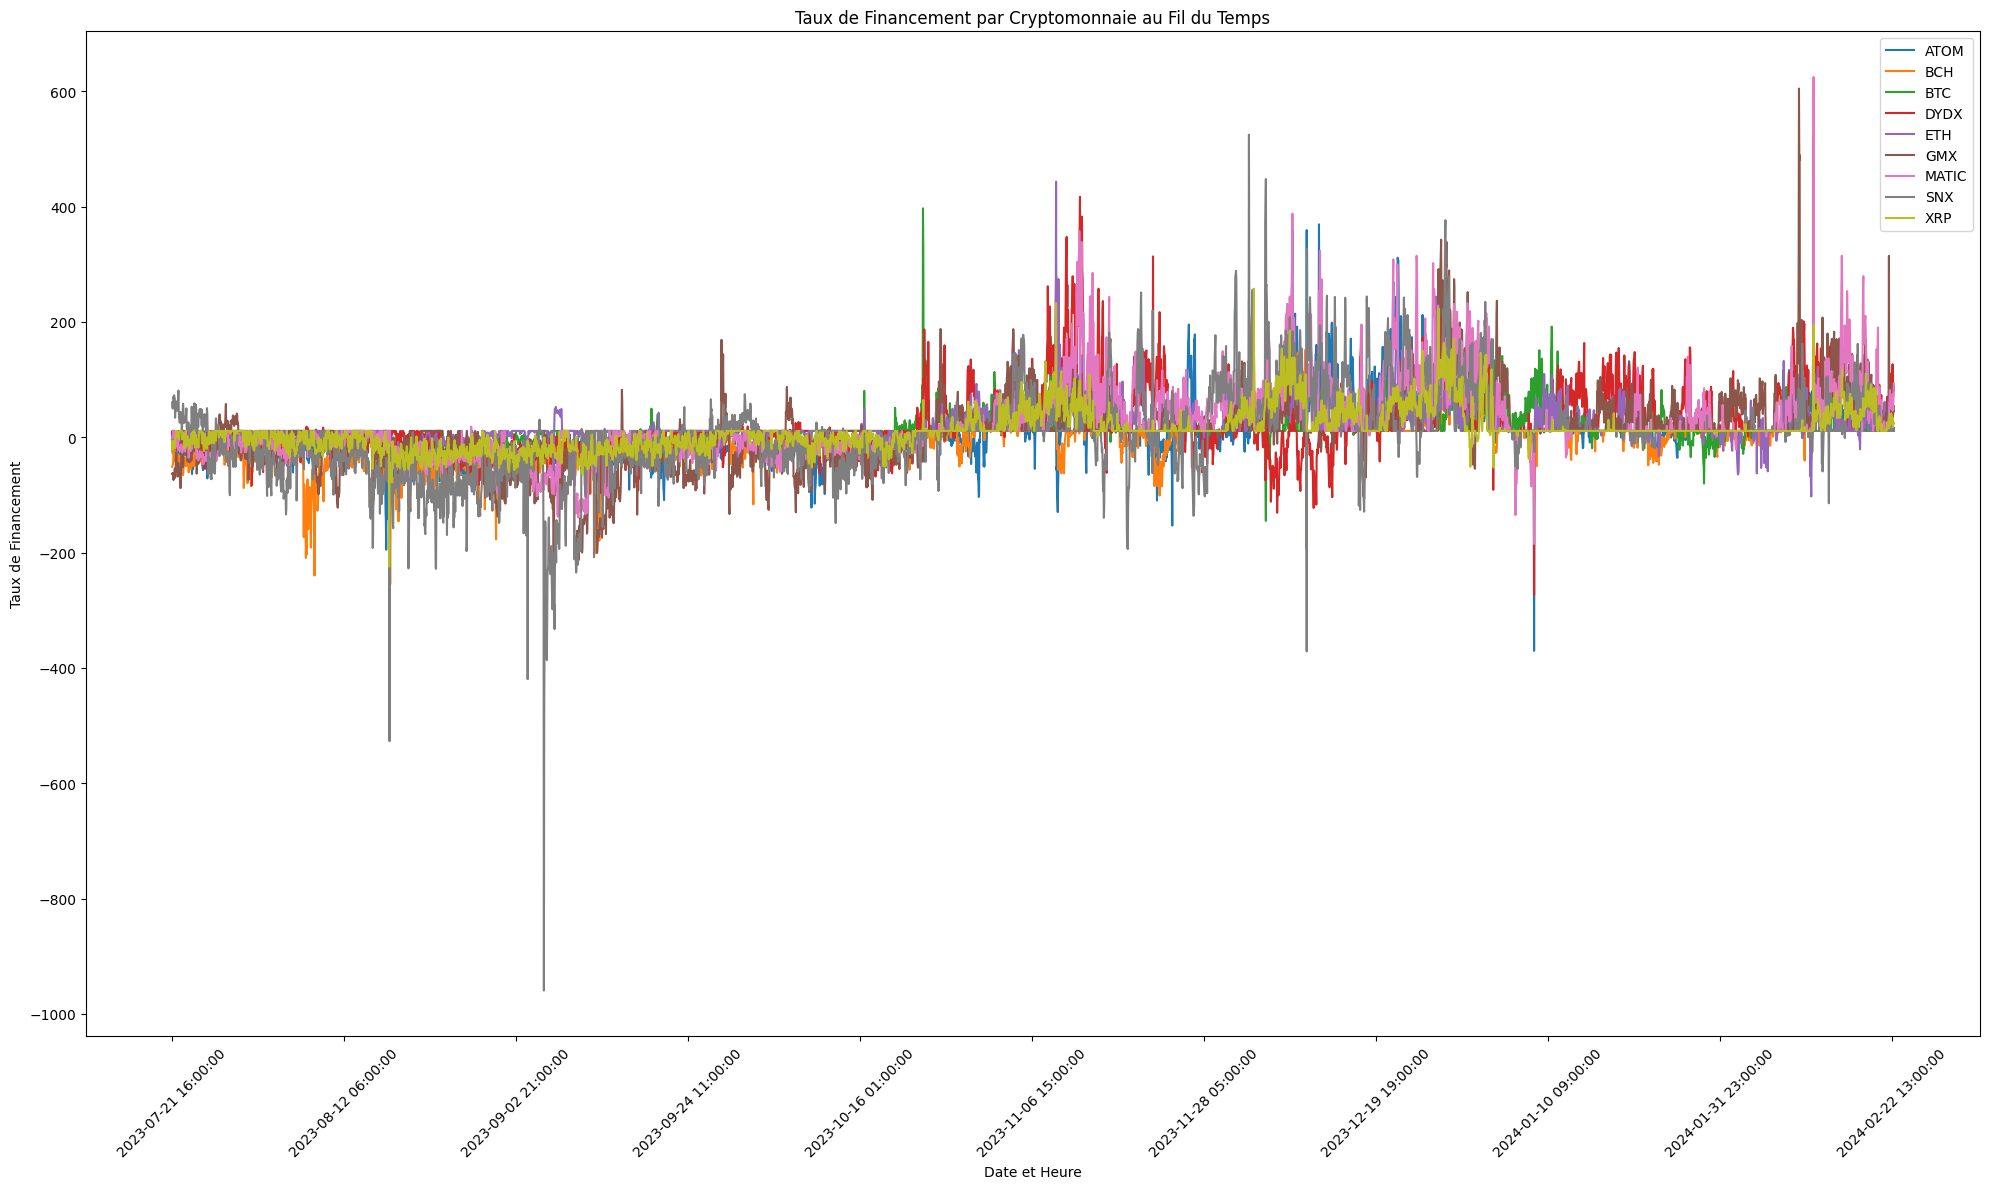

In [20]:
# Tracé du graphique en ligne
plt.figure(figsize=(20, 12))
for column in df_pivot_clean.columns:
    plt.plot(df_pivot_clean.index, df_pivot_clean[column], label=column)

plt.xlabel('Date et Heure')
plt.ylabel('Taux de Financement')
plt.title('Taux de Financement par Cryptomonnaie au Fil du Temps')
xticks = df_pivot_clean.index[::len(df_pivot_clean.index)//10]
plt.xticks(ticks = xticks,rotation=45, labels=[x for x in xticks])
plt.legend()
plt.tight_layout()
plt.show()

<Axes: xlabel='time'>

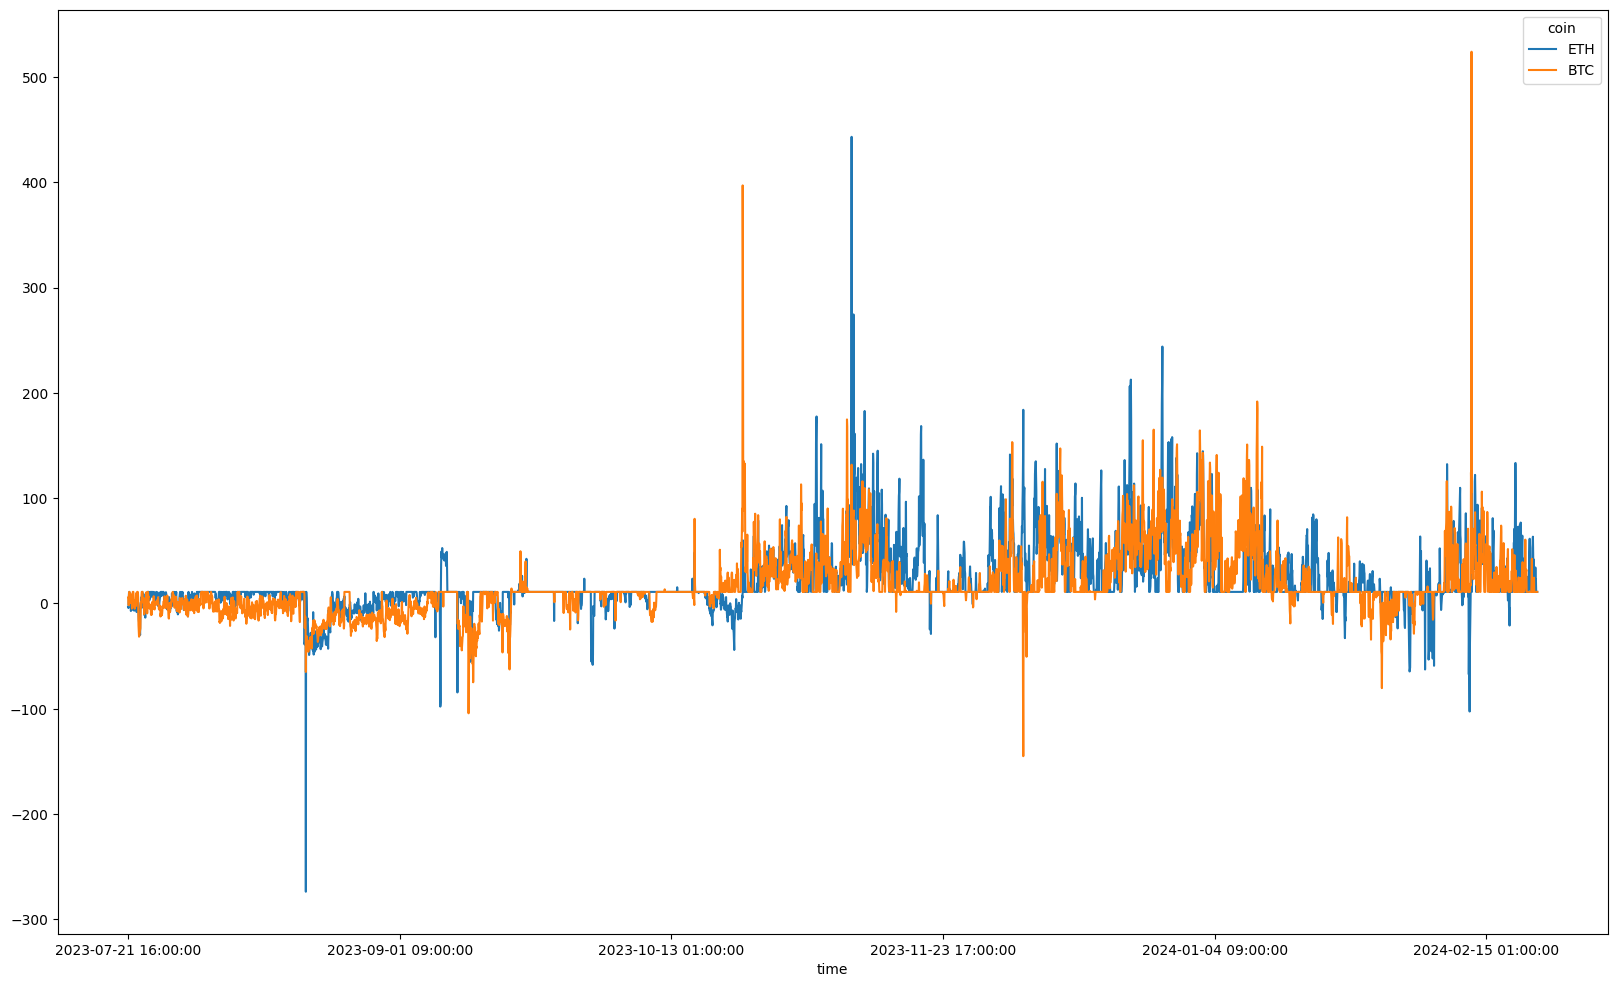

In [21]:
# Analyze ETH and BTC funding rates
df_pivot_clean[['ETH', 'BTC']].plot(figsize=(20, 12))